In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


import matplotlib.pyplot as plt

In [2]:
def contar_palavras(texto):
    palavras = texto.split()
    return len(palavras)

In [3]:
df_unique_index_nf = pd.read_csv('df_unique_index_nf.csv')
df_unique_index_nf

,Unnamed: 0.1,Unnamed: 0,ID,MODELO,SERIE,NUMERO_NOTA_FISCAL,DATA_EMISSAO,CNPJ_CPF_EMITENTE,RAZAO_SOCIAL_EMITENTE,NOME_FANTASIA_EMITENTE,...,DESCRICAO_PRODUTO,UNIDADE_PRODUTO,UNIDADE_PRODUTO_TRIBUTAVEL,QUANTIDADE_PRODUTO,QUANTIDADE_PRODUTO_TRIBUTAVEL,VALOR_PRODUTO,VALOR_PRODUTO_TRIBUTAVEL,CODIGO_BARRA,CODIGO_BARRA_TRIBUTAVEL,NCM
0,0,0,49537821,55,1,13870,2023-01-18 00:00:00.000,25546178000163,E. Zicolau Comercio Eletronico Me,Magazine Mega,...,Kit Eletrofita 2 Pistas 3 Metros 750V 10A,UN,UN,1.0,1.0,99.50,99.50,7901065314497,7901065314497,85444900
1,1,1,53886647,55,1,109951,2023-02-22 00:00:00.000,5677144000109,COMPLETA COMERCIO DE FERRAGENS E UTILIDADES EI...,COMPLETA,...,ABRAC TIPO U VERG 1X1/4 25PC,UN,UN,1.0,1.0,78.09,78.09,7899960444053,7899960444053,73269090
2,2,2,38357115,55,1,2927,2022-10-26 00:00:00.000,22793733000406,F PELEGRINELLI EIRELI,REI DOS PNEUS - FILIAL3,...,KIT AMORTECEDOR COMPLETO NAKATA LE,UN,PC,1.0,1.0,210.00,210.00,7890903046815,7890903046815,87088000
3,3,3,67282171,55,8,100,2023-06-02 00:00:00.000,28649167000105,A THOMAZINI COELHO FARMA LTDA,NaN,...,CEBRILIN 30MG C/30 COMP LIBBS,UND,UND,4.0,4.0,154.73,154.73,7896094202276,7896094202276,30049079
4,4,4,33006554,55,1,12023,2022-09-19 00:00:00.000,28411830000120,AGRONORTE COMERCIO E REPRESENTACAO LTDA,AGRONORTE PRODUTOS AGROPECUARIOS,...,FOICE COMUM LEVE LP,UN,UN,1.0,1.0,65.00,65.00,7898906966277,7898906966277,82019000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124634,1124684,1124684,75293628,55,1,744,2023-07-28 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.51),UN,UN,1.0,1.0,93.42,93.42,7891033716418,7891033716418,33072010
1124635,1124685,1124685,75324339,55,1,750,2023-07-29 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.17),UN,UN,1.0,1.0,82.43,82.43,7891033716418,7891033716418,33072010
1124636,1124686,1124686,75501409,55,1,151025,2023-07-31 00:00:00.000,26554435000171,L & G ALIMENTOS DO BRASIL LTDA,MERCALE - ARV,...,LIMP PISO CIF PERFUME 900ML ENERGIZANTE UN QTD...,UN,UN,6.0,6.0,6.48,6.48,7891150071537,7891150071537,34025000
1124637,1124687,1124687,75561037,55,5,4712030,2023-07-31 00:00:00.000,14190675000317,LSI S.A.,LSI S.A.,...,LOVERS FORCEPS 18R ADULTO - GOLGRAN,UNIDAD,1,1.0,1.0,93.90,93.90,7899065804998,7899065804998,90184999


In [4]:
df_unique_index_nf['quantidade_palavras'] = df_unique_index_nf['DESCRICAO_PRODUTO'].apply(contar_palavras)

In [6]:
df_unique_index_nf[['DESCRICAO_PRODUTO', 'quantidade_palavras']]

,DESCRICAO_PRODUTO,quantidade_palavras
0,Kit Eletrofita 2 Pistas 3 Metros 750V 10A,8
1,ABRAC TIPO U VERG 1X1/4 25PC,6
2,KIT AMORTECEDOR COMPLETO NAKATA LE,5
3,CEBRILIN 30MG C/30 COMP LIBBS,5
4,FOICE COMUM LEVE LP,4
...,...,...
1124634,FLORATTA DES COL F/SECRET 75ml (Desc. 0.51),7
1124635,FLORATTA DES COL F/SECRET 75ml (Desc. 0.17),7
1124636,LIMP PISO CIF PERFUME 900ML ENERGIZANTE UN QTD...,10
1124637,LOVERS FORCEPS 18R ADULTO - GOLGRAN,6


(0.0, 5.0]


[Text(0, 0, '0-5'),
 Text(1, 0, '5-10'),
 Text(2, 0, '10-15'),
 Text(3, 0, '15-20'),
 Text(4, 0, '20-25'),
 Text(5, 0, '25-30'),
 Text(6, 0, '>= 30')]

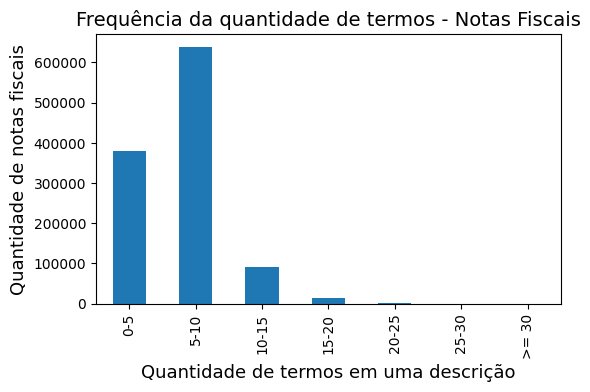

In [60]:
bins = list(range(0, 31, 5)) + [float('inf')]

fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.cut(df_unique_index_nf['quantidade_palavras'], bins=bins)
        .value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)


ax.set_title('Frequência da quantidade de termos - Notas Fiscais', fontsize = 14)
ax.set_xlabel('Quantidade de termos em uma descrição', fontsize = 13)
ax.set_ylabel('Quantidade de notas fiscais', fontsize = 13)
ticks = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '>= 30']

In [73]:
dv_relev_sample = pd.read_csv('dv_relev_sample.csv')
ids_sample = dv_relev_sample['CODIGO_BARRA'].tolist()


In [70]:
unique = pd.read_csv('notasFiscais/df_nf_unique.csv')
unique



,ID,MODELO,SERIE,NUMERO_NOTA_FISCAL,DATA_EMISSAO,CNPJ_CPF_EMITENTE,RAZAO_SOCIAL_EMITENTE,NOME_FANTASIA_EMITENTE,TIPO_DESTINATARIO,CNPJ_CPF_DESTINATARIO,...,DESCRICAO_PRODUTO,UNIDADE_PRODUTO,UNIDADE_PRODUTO_TRIBUTAVEL,QUANTIDADE_PRODUTO,QUANTIDADE_PRODUTO_TRIBUTAVEL,VALOR_PRODUTO,VALOR_PRODUTO_TRIBUTAVEL,CODIGO_BARRA,CODIGO_BARRA_TRIBUTAVEL,NCM
0,10,55,21,37005,2022-01-01 00:00:00.000,56228356013381,CRBS S/A - CDC Rio Branco,CDC RIO BRANCO,PESSOA_JURIDICA,NaN,...,"SKOL 600ML 6,...",Un,Un,2.0,2.0,5.69,5.69,7891149200405,7891149200405,22030000
1,14,55,21,37005,2022-01-01 00:00:00.000,56228356013381,CRBS S/A - CDC Rio Branco,CDC RIO BRANCO,PESSOA_JURIDICA,NaN,...,"ANTARCTICA PILSEN LATA 350ML SH C/12 NPAL 10,...",Un,Un,12.0,12.0,10.22,10.22,7891991002141,7891991000796,22030000
2,16,55,21,37005,2022-01-01 00:00:00.000,56228356013381,CRBS S/A - CDC Rio Branco,CDC RIO BRANCO,PESSOA_JURIDICA,NaN,...,"PEPSI COLA PET 2L CAIXA C/6 9,...",Un,Un,1.0,1.0,9.61,9.61,7892840800246,7892840800000,22021000
3,53,55,1,2148830,2022-01-01 00:00:00.000,3007331001032,EBAZAR.COM.BR. LTDA,NaN,PESSOA_FISICA,NaN,...,Potes Hermeticos Porta-Mantimentos Tampa Bambu...,UN,UN,1.0,1.0,139.90,139.90,7909569365786,7909569365786,70134290
4,88,55,1,25085,2022-01-01 00:00:00.000,21393527000101,RECOL FARMA LTDA.,RECOL FARMA - 24HORAS,PESSOA_JURIDICA,NaN,...,GRIPINEW C/20 CPR,UN1,UN1,1.0,1.0,8.99,8.99,7896862920029,7896862920029,30045090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248616,75679419,55,10,12741,2023-07-31 00:00:00.000,5915706000105,COMERCIAL JAPIIM LTDA,COMERCIAL JAPIIM,PESSOA_JURIDICA,NaN,...,ROSQUINHA CHOCOLATE ZERO LOW 150G,UN1,UN1,1.0,1.0,8.07,8.07,7896292070080,7896292070080,19053100
2248617,75679436,55,10,12741,2023-07-31 00:00:00.000,5915706000105,COMERCIAL JAPIIM LTDA,COMERCIAL JAPIIM,PESSOA_JURIDICA,NaN,...,BISC HOT CRACK QUEIJO 150G,UN1,UN1,8.0,8.0,6.26,6.26,7896011105499,7896011105499,19053100
2248618,75679441,55,10,12741,2023-07-31 00:00:00.000,5915706000105,COMERCIAL JAPIIM LTDA,COMERCIAL JAPIIM,PESSOA_JURIDICA,NaN,...,MACARRAO NINHO LARGO PARATI 500G,UN1,UN1,1.0,1.0,5.25,5.25,7896011107028,7896011107028,19021100
2248619,75679480,55,10,12742,2023-07-31 00:00:00.000,5915706000105,COMERCIAL JAPIIM LTDA,COMERCIAL JAPIIM,PESSOA_JURIDICA,NaN,...,GRAFITE ESTAMPADAS,UN1,UN1,1.0,1.0,1.00,1.00,6944504411457,6944504411457,96084000


In [75]:
sample_nf = unique[unique['CODIGO_BARRA'].isin(ids_sample)]
sample_nf

,ID,MODELO,SERIE,NUMERO_NOTA_FISCAL,DATA_EMISSAO,CNPJ_CPF_EMITENTE,RAZAO_SOCIAL_EMITENTE,NOME_FANTASIA_EMITENTE,TIPO_DESTINATARIO,CNPJ_CPF_DESTINATARIO,...,DESCRICAO_PRODUTO,UNIDADE_PRODUTO,UNIDADE_PRODUTO_TRIBUTAVEL,QUANTIDADE_PRODUTO,QUANTIDADE_PRODUTO_TRIBUTAVEL,VALOR_PRODUTO,VALOR_PRODUTO_TRIBUTAVEL,CODIGO_BARRA,CODIGO_BARRA_TRIBUTAVEL,NCM
758,21152,55,1,115652,2022-01-02 00:00:00.000,84308980000184,A.C.D.A. IMPORTACAO E EXPORTACAO LTDA,ARASUPER BOSQUE,PESSOA_FISICA,NaN,...,IOG POLPA NINHO 540G,UN1,UN1,1.0,1.0,6.69,6.69,7891000261026,7891000261026,4031000
1445,35412,55,2,6658,2022-01-03 00:00:00.000,4119970001214,AGRO BOI IMPORTACAO E EXPORTACAO LTDA,AGROBOI CORES,PESSOA_JURIDICA,NaN,...,"ACRILICO TOQUE DE LUZ 3,2L BASE C2",UN,UN,1.0,1.0,140.00,140.00,7891260382752,7891260382752,32091010
3612,72951,55,1,23493,2022-01-03 00:00:00.000,4521258001590,J CRUZ LTDA-HOJE,HOJE COSMETICS 15-90,PESSOA_JURIDICA,NaN,...,KIT PANTENE HIDRATACAO SH350ML+COND175ML,UN,UN,12.0,12.0,21.37,21.37,7500435169370,7500435169370,33051000
5026,106527,55,1,199740,2022-01-03 00:00:00.000,3345935000106,DISFRI IMPORTACAO E EXPORTACAO LTDA - F5,DISFRI-RIO BRANCO MATRIZ,PESSOA_JURIDICA,NaN,...,IOG POLPA NINHO MORANGO 540G(1968),BJ,BJ,6.0,6.0,5.90,5.90,7891000261026,7891000261026,4031000
6639,141465,55,1,28596,2022-01-04 00:00:00.000,14804412000350,SUPERMERCADO PAGUE POUCO LTDA,SUPERMERCADO PAGUE POUCO,PESSOA_JURIDICA,NaN,...,LIMP VEJA DESNG SQUEEZE L500P400ML,UN1,UN1,1.0,1.0,9.49,9.49,7891035800245,7891035800245,34022000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234377,75293628,55,1,744,2023-07-28 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,PESSOA_FISICA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.51),UN,UN,1.0,1.0,93.42,93.42,7891033716418,7891033716418,33072010
2235406,75324339,55,1,750,2023-07-29 00:00:00.000,15191890000648,L. L. B. R. DISTRIBUIDORA LTDA,NaN,PESSOA_FISICA,NaN,...,FLORATTA DES COL F/SECRET 75ml (Desc. 0.17),UN,UN,1.0,1.0,82.43,82.43,7891033716418,7891033716418,33072010
2242133,75501409,55,1,151025,2023-07-31 00:00:00.000,26554435000171,L & G ALIMENTOS DO BRASIL LTDA,MERCALE - ARV,PESSOA_JURIDICA,NaN,...,LIMP PISO CIF PERFUME 900ML ENERGIZANTE UN QTD...,UN,UN,6.0,6.0,6.48,6.48,7891150071537,7891150071537,34025000
2244695,75561037,55,5,4712030,2023-07-31 00:00:00.000,14190675000317,LSI S.A.,LSI S.A.,PESSOA_FISICA,NaN,...,LOVERS FORCEPS 18R ADULTO - GOLGRAN,UNIDAD,1,1.0,1.0,93.90,93.90,7899065804998,7899065804998,90184999


In [83]:
dv_relev_sample['quantidade_codigo'] = sample_nf['CODIGO_BARRA'].value_counts().values
dv_relev_sample

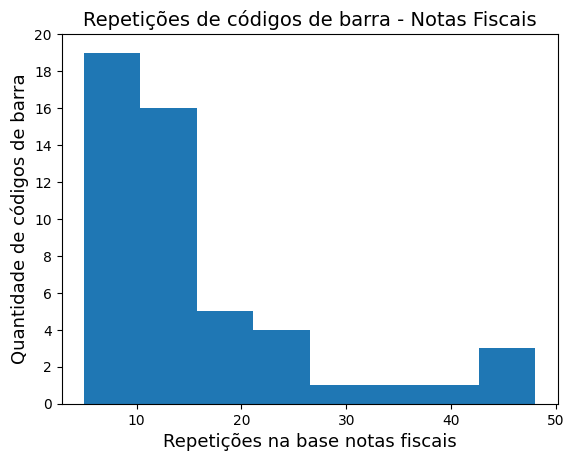

In [92]:
bins = list(range(0, 31, 5)) + [float('inf')]

plt.hist(dv_relev_sample['quantidade_codigo'], bins = 8)
plt.title('Repetições de códigos de barra - Notas Fiscais', fontsize = 14)
plt.xlabel('Repetições na base notas fiscais', fontsize = 13)
plt.ylabel('Quantidade de códigos de barra', fontsize = 13)
plt.yticks(range(0,21, 2))
plt.show()


# CATMAT

In [8]:
df_index_catmat = pd.read_csv('df_index_catmat_resample.csv')
df_index_catmat

/tmp/ipykernel_41866/1942492608.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_index_catmat = pd.read_csv('df_index_catmat_resample.csv')


,Unnamed: 0.1,Unnamed: 0,ID_MATERIAL,TIPO,CODIGO_MATERIAL,ITEM_SUSPENSO,MATERIAL_SUSTENTAVEL,CODIGO_CLASSE,DESCRICAO_CLASSE,CODIGO_SUBCLASSE,DESCRICAO_SUBCLASSE,CODIGO_GRUPO,DESCRICAO_GRUPO,CODIGO_DIVISAO,DESCRICAO_DIVISAO,CODIGO_SECAO,DESCRICAO_SECAO,CARACTERISTICAS_BUSCA,NOME_MATERIAL,MATERIAL_TEXT
0,0,0.0,431550,M,600581.0,N,N,5905,RESISTORES,NaN,NaN,59,COMPONENTES DE EQUIPAMENTOS ELÉTRICOS E ELETRÔ...,NaN,NaN,NaN,NaN,Resistência Nominal 1k8OHMS Potência Nominal 1...,Resistor Carbono,Resistor Carbono Resistência Nominal 1k8OHMS P...
1,1,1.0,431551,M,600580.0,N,N,5905,RESISTORES,NaN,NaN,59,COMPONENTES DE EQUIPAMENTOS ELÉTRICOS E ELETRÔ...,NaN,NaN,NaN,NaN,Potência Nominal 1UN Tipo Fixo Aplicação Eletr...,Resistor Carbono,Resistor Carbono Potência Nominal 1UN Tipo Fix...
2,2,2.0,431552,M,600579.0,N,N,5905,RESISTORES,NaN,NaN,59,COMPONENTES DE EQUIPAMENTOS ELÉTRICOS E ELETRÔ...,NaN,NaN,NaN,NaN,Potência Nominal 1UN Tipo Fixo Aplicação Eletr...,Resistor Carbono,Resistor Carbono Potência Nominal 1UN Tipo Fix...
3,3,3.0,431553,M,600578.0,N,N,5905,RESISTORES,NaN,NaN,59,COMPONENTES DE EQUIPAMENTOS ELÉTRICOS E ELETRÔ...,NaN,NaN,NaN,NaN,Potência Nominal 1UN Tipo Fixo Aplicação Eletr...,Resistor Carbono,Resistor Carbono Potência Nominal 1UN Tipo Fix...
4,4,4.0,431554,M,600576.0,N,N,5905,RESISTORES,NaN,NaN,59,COMPONENTES DE EQUIPAMENTOS ELÉTRICOS E ELETRÔ...,NaN,NaN,NaN,NaN,Tipo Fixo Aplicação Eletrônica Resistência Nom...,Resistor Carbono,Resistor Carbono Tipo Fixo Aplicação Eletrônic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244333,253811,253861.0,683446,M,377520.0,S,N,6145,FIOS E CABOS ELÉTRICOS,NaN,NaN,61,CONDUTORES ELÉTRICOS E EQUIPAMENTOS PARA GERAÇ...,NaN,NaN,NaN,NaN,Aplicação Uso Em Vídeo Características Adicion...,Cabo De Vídeo,Cabo De Vídeo Aplicação Uso Em Vídeo Caracterí...
244334,253812,253862.0,683447,M,377519.0,S,N,6145,FIOS E CABOS ELÉTRICOS,NaN,NaN,61,CONDUTORES ELÉTRICOS E EQUIPAMENTOS PARA GERAÇ...,NaN,NaN,NaN,NaN,Aplicação Uso Em Vídeo N° De Cabos 3UN Tipo An...,Cabo De Vídeo,Cabo De Vídeo Aplicação Uso Em Vídeo N° De Cab...
244335,253813,253863.0,683780,M,612103.0,N,N,6540,"EQUIPAMENTOS, INSTRUMENTOS E SUPRIMENTOS OFTAL...",NaN,NaN,65,"EQUIPAMENTOS E ARTIGOS PARA USO MÉDICO, DENTÁR...",NaN,NaN,NaN,NaN,Tipo Grande Ocular Modelo De Não Contato Aplic...,Sistema De Lentes Para Equipamento Oftalmológico,Sistema De Lentes Para Equipamento Oftalmológi...
244336,253814,253864.0,683781,M,229763.0,N,N,6540,"EQUIPAMENTOS, INSTRUMENTOS E SUPRIMENTOS OFTAL...",NaN,NaN,65,"EQUIPAMENTOS E ARTIGOS PARA USO MÉDICO, DENTÁR...",NaN,NaN,NaN,NaN,Material Cristal Características Adicionais Au...,Sistema De Lentes Para Equipamento Oftalmológico,Sistema De Lentes Para Equipamento Oftalmológi...


In [16]:
df_index_catmat['quantidade_palavras'] = df_index_catmat['MATERIAL_TEXT'].apply(contar_palavras)

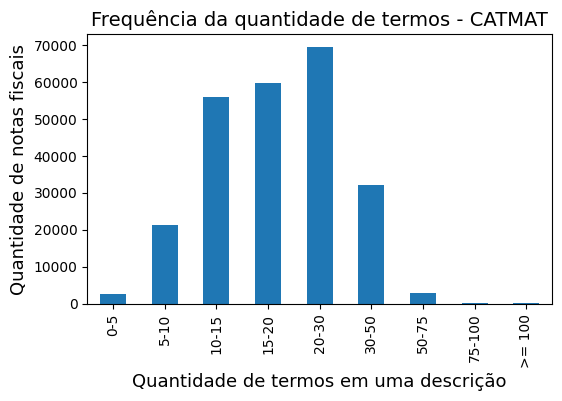

In [61]:
bins = list([0,5,10,15, 20,30, 50, 75,100]) + [float('inf')]

fig, ax = plt.subplots(figsize=(6, 3.5))
(
    pd.cut(df_index_catmat['quantidade_palavras'], bins=bins)
        .value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)

ax.set_title('Frequência da quantidade de termos - CATMAT', fontsize = 14)
ax.set_xlabel('Quantidade de termos em uma descrição', fontsize = 13)
ax.set_ylabel('Quantidade de notas fiscais', fontsize = 13)
ticks = ['0-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-75', '75-100', '>= 100']
ax.set_xticklabels(ticks)

plt.show()

In [7]:
df_por_sizes = pd.read_csv('df_por_sizes.csv')
df_por_sizes

,Unnamed: 0,abordagem,size_page,precision_query,recall_query,f1-score_query,ndcg_query,precision_sinonimos,recall_sinonimos,f1-score_sinonimos,ndcg_sinonimos,precision_erros_digitacao,recall_erros_digitacao,f1-score_erros_digitacao,ndcg_erros_digitacao,precision_reordenados,recall_reordenados,f1-score_reordenados,ndcg_reordenados
0,0,lexico,1,1.00,0.500000,0.666667,1.000000,1.00,0.500000,0.666667,1.000000,1.00,0.500000,0.666667,1.000000,1.00,0.500000,0.666667,1.000000
1,1,semantico,1,1.00,0.500000,0.666667,1.000000,1.00,0.500000,0.666667,1.000000,1.00,0.500000,0.666667,1.000000,1.00,0.500000,0.666667,1.000000
2,2,lexico,1,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000
3,3,semantico,1,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000
4,4,lexico,1,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000,1.00,0.125000,0.222222,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,95,semantico,50,0.04,0.060606,0.048193,1.000000,0.04,0.060606,0.048193,0.940172,0.04,0.060606,0.048193,0.999763,0.04,0.060606,0.048193,0.997982
896,96,lexico,50,0.18,1.000000,0.305085,0.977015,0.18,1.000000,0.305085,0.977015,0.18,1.000000,0.305085,1.000000,0.18,1.000000,0.305085,0.977015
897,97,semantico,50,0.18,1.000000,0.305085,0.990890,0.08,0.444444,0.135593,0.986631,0.18,1.000000,0.305085,0.995955,0.18,1.000000,0.305085,0.995955
898,98,lexico,50,0.26,0.684211,0.376812,0.981351,0.18,0.473684,0.260870,0.894397,0.34,0.894737,0.492754,0.951002,0.26,0.684211,0.376812,0.981351


In [8]:
grouped_catmat = df_por_sizes.groupby(['size_page', 'abordagem'], as_index=False).agg({
    'ndcg_erros_digitacao': 'mean', 'precision_erros_digitacao': 'mean', 'f1-score_erros_digitacao': 'mean', 'recall_erros_digitacao': 'mean',
    'ndcg_query': 'mean', 'precision_query': 'mean', 'f1-score_query': 'mean', 'recall_query': 'mean',
    'ndcg_sinonimos': 'mean', 'precision_sinonimos': 'mean', 'f1-score_sinonimos': 'mean', 'recall_sinonimos': 'mean',
    'ndcg_reordenados': 'mean', 'precision_reordenados': 'mean', 'f1-score_reordenados': 'mean', 'recall_reordenados': 'mean'
    })
grouped_catmat

,size_page,abordagem,ndcg_erros_digitacao,precision_erros_digitacao,f1-score_erros_digitacao,recall_erros_digitacao,ndcg_query,precision_query,f1-score_query,recall_query,ndcg_sinonimos,precision_sinonimos,f1-score_sinonimos,recall_sinonimos,ndcg_reordenados,precision_reordenados,f1-score_reordenados,recall_reordenados
0,1,lexico,0.980000,0.980000,0.181210,0.106408,0.980000,0.980000,0.181210,0.106408,0.980000,0.960000,0.179105,0.105297,0.980000,0.980000,0.181210,0.106408
1,1,semantico,0.980000,0.920000,0.172477,0.101347,1.000000,0.920000,0.172477,0.101347,0.900000,0.860000,0.167409,0.098678,1.000000,0.920000,0.172477,0.101347
2,2,lexico,0.992619,0.880000,0.284314,0.187180,0.992619,0.930000,0.295114,0.193544,0.992619,0.920000,0.297209,0.195534,0.992619,0.930000,0.295114,0.193544
3,2,semantico,0.975934,0.800000,0.254136,0.166620,0.991868,0.820000,0.265378,0.174551,0.912619,0.770000,0.255838,0.169142,0.995934,0.800000,0.262991,0.173298
4,3,lexico,0.991013,0.833333,0.357600,0.259549,0.991738,0.893333,0.381475,0.275632,0.992619,0.860000,0.370358,0.268001,0.991738,0.893333,0.381475,0.275632
5,3,semantico,0.969642,0.733333,0.312354,0.225132,0.990910,0.746667,0.320824,0.231703,0.899388,0.693333,0.305823,0.222859,0.985873,0.773333,0.338073,0.244528
6,5,lexico,0.987117,0.756000,0.445892,0.377816,0.988305,0.824000,0.485302,0.408734,0.988793,0.768000,0.456785,0.387215,0.988305,0.824000,0.485302,0.408734
7,5,semantico,0.965636,0.628000,0.372832,0.313841,0.985030,0.668000,0.408038,0.346813,0.896423,0.592000,0.358040,0.303239,0.985555,0.672000,0.407870,0.345899
8,10,lexico,0.968437,0.616000,0.492370,0.519929,0.975968,0.668000,0.539495,0.569285,0.976160,0.604000,0.489879,0.520408,0.976672,0.668000,0.539495,0.569285
9,10,semantico,0.953086,0.446000,0.369843,0.396434,0.975860,0.476000,0.405911,0.445211,0.896470,0.420000,0.356842,0.391291,0.980016,0.486000,0.406082,0.437937


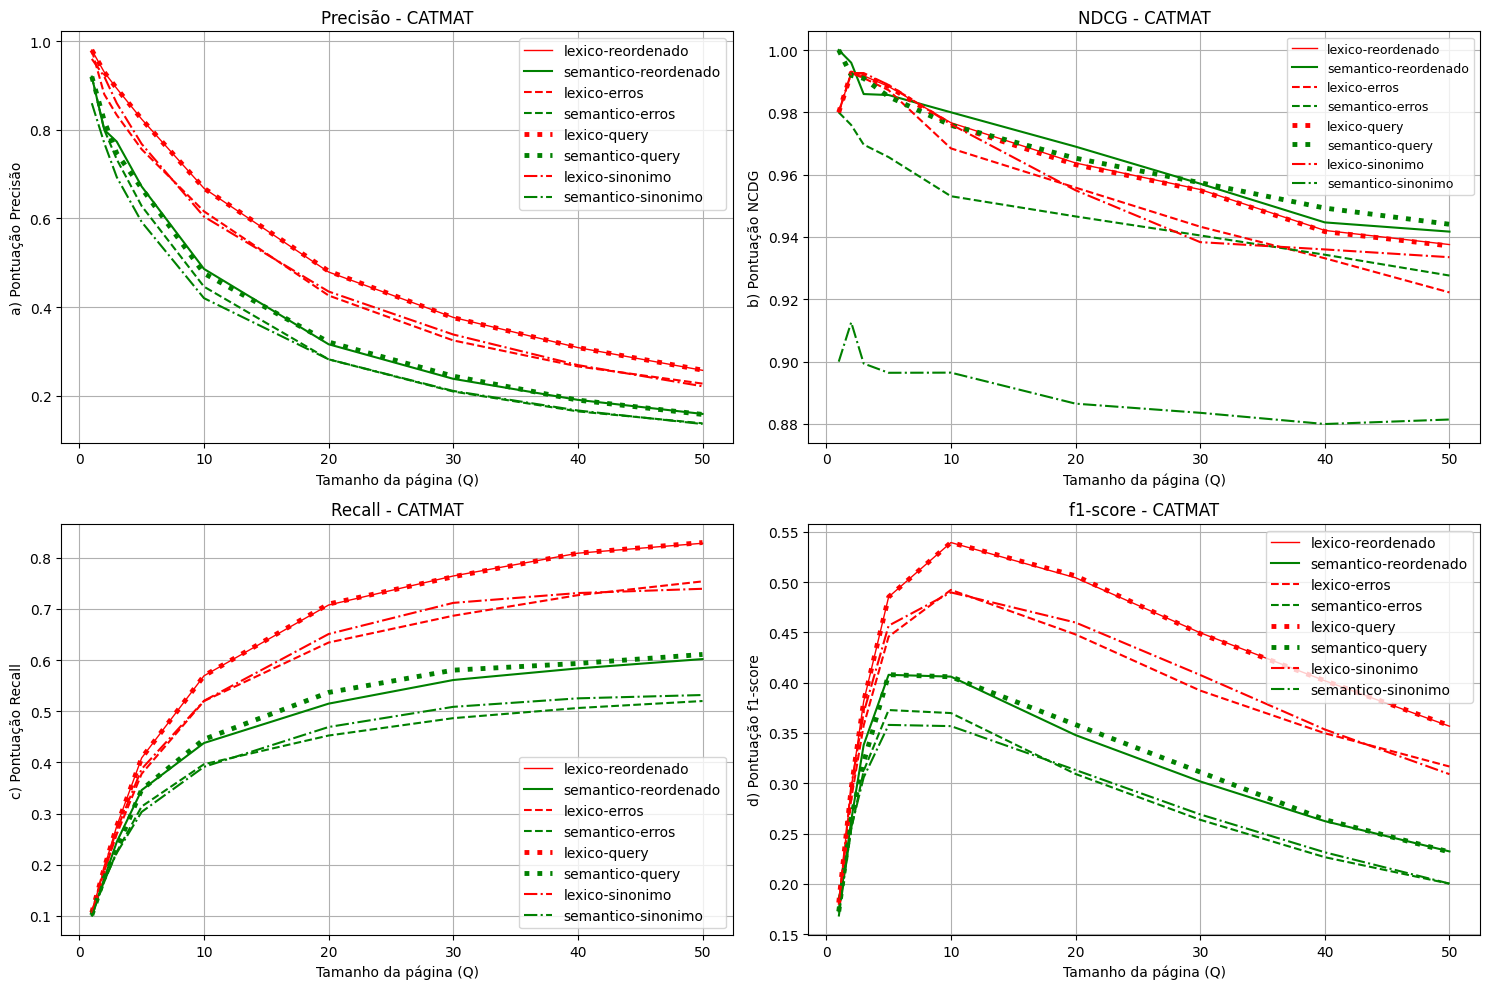

In [27]:
import matplotlib.pyplot as plt
import numpy as np

lexico = grouped_catmat[grouped_catmat['abordagem'] == 'lexico']   

semantico = grouped_catmat[grouped_catmat['abordagem'] == 'semantico']   
_, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0,0].set_title('Precisão - CATMAT')
ax[0,0].set_xlabel('Tamanho da página (Q)')
ax[0,0].set_ylabel('a) Pontuação Precisão')
ax[0,0].plot(lexico['size_page'], lexico['precision_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[0,0].plot(semantico['size_page'], semantico['precision_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[0,0].plot(lexico['size_page'], lexico['precision_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[0,0].plot(semantico['size_page'], semantico['precision_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[0,0].plot(lexico['size_page'], lexico['precision_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[0,0].plot(semantico['size_page'], semantico['precision_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[0,0].plot(lexico['size_page'], lexico['precision_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[0,0].plot(semantico['size_page'], semantico['precision_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[0,0].grid('major')
ax[0,0].legend()

ax[0,1].set_title('NDCG - CATMAT')
ax[0,1].set_xlabel('Tamanho da página (Q)')
ax[0,1].set_ylabel('b) Pontuação NCDG')
ax[0,1].plot(lexico['size_page'], lexico['ndcg_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[0,1].plot(lexico['size_page'], lexico['ndcg_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[0,1].plot(lexico['size_page'], lexico['ndcg_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[0,1].plot(lexico['size_page'], lexico['ndcg_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[0,1].grid('major')
ax[0,1].legend(fontsize=9)

ax[1,0].set_title('Recall - CATMAT')
ax[1,0].set_xlabel('Tamanho da página (Q)')
ax[1,0].set_ylabel('c) Pontuação Recall')
ax[1,0].plot(lexico['size_page'], lexico['recall_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[1,0].plot(semantico['size_page'], semantico['recall_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[1,0].plot(lexico['size_page'], lexico['recall_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[1,0].plot(semantico['size_page'], semantico['recall_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[1,0].plot(lexico['size_page'], lexico['recall_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[1,0].plot(semantico['size_page'], semantico['recall_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[1,0].plot(lexico['size_page'], lexico['recall_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[1,0].plot(semantico['size_page'], semantico['recall_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[1,0].grid('major')
ax[1,0].legend()

ax[1,1].set_title('f1-score - CATMAT')
ax[1,1].set_xlabel('Tamanho da página (Q)')
ax[1,1].set_ylabel('d) Pontuação f1-score')
ax[1,1].plot(lexico['size_page'], lexico['f1-score_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[1,1].plot(lexico['size_page'], lexico['f1-score_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[1,1].plot(lexico['size_page'], lexico['f1-score_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[1,1].plot(lexico['size_page'], lexico['f1-score_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[1,1].grid('major')
ax[1,1].legend(fontsize=10)


plt.tight_layout()
plt.show()


In [18]:
df_por_sizes_nf = pd.read_csv('results_metricas_nf.csv')
df_por_sizes_nf

,Unnamed: 0,abordagem,size_page,precision_query,recall_query,f1-score_query,ndcg_query,precision_sinonimos,recall_sinonimos,f1-score_sinonimos,ndcg_sinonimos,precision_erros_digitacao,recall_erros_digitacao,f1-score_erros_digitacao,ndcg_erros_digitacao,precision_reordenados,recall_reordenados,f1-score_reordenados,ndcg_reordenados
0,0,lexico,1,1.00,0.083333,0.153846,1.000000,1.00,0.083333,0.153846,1.000000,1.00,0.083333,0.153846,1.000000,1.00,0.083333,0.153846,1.000000
1,1,semantico,1,1.00,0.083333,0.153846,1.000000,1.00,0.083333,0.153846,1.000000,1.00,0.083333,0.153846,1.000000,1.00,0.083333,0.153846,1.000000
2,2,lexico,1,0.00,0.000000,0.000000,1.000000,0.00,0.000000,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,1.000000
3,3,semantico,1,1.00,0.083333,0.153846,1.000000,1.00,0.083333,0.153846,1.000000,0.00,0.000000,0.000000,1.000000,1.00,0.083333,0.153846,1.000000
4,4,lexico,1,1.00,0.047619,0.090909,1.000000,0.00,0.000000,0.000000,0.000000,1.00,0.047619,0.090909,1.000000,1.00,0.047619,0.090909,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,95,semantico,50,0.08,1.000000,0.148148,0.748676,0.08,1.000000,0.148148,0.853108,0.08,1.000000,0.148148,0.722465,0.08,1.000000,0.148148,0.883824
1996,96,lexico,50,0.06,0.500000,0.107143,0.666373,0.06,0.500000,0.107143,0.678762,0.10,0.833333,0.178571,0.594058,0.06,0.500000,0.107143,0.666373
1997,97,semantico,50,0.10,0.833333,0.178571,0.519218,0.06,0.500000,0.107143,0.393968,0.10,0.833333,0.178571,0.558761,0.10,0.833333,0.178571,0.533503
1998,98,lexico,50,0.24,0.521739,0.328767,0.579758,0.06,0.130435,0.082192,0.451955,0.24,0.521739,0.328767,0.579758,0.24,0.521739,0.328767,0.579758


In [20]:
grouped_nf = df_por_sizes_nf.groupby(['size_page', 'abordagem'], as_index=False).agg({
    'ndcg_erros_digitacao': 'mean', 'precision_erros_digitacao': 'mean', 'f1-score_erros_digitacao': 'mean', 'recall_erros_digitacao': 'mean',
    'ndcg_query': 'mean', 'precision_query': 'mean', 'f1-score_query': 'mean', 'recall_query': 'mean',
    'ndcg_sinonimos': 'mean', 'precision_sinonimos': 'mean', 'f1-score_sinonimos': 'mean', 'recall_sinonimos': 'mean',
    'ndcg_reordenados': 'mean', 'precision_reordenados': 'mean', 'f1-score_reordenados': 'mean', 'recall_reordenados': 'mean'
    })
grouped_nf

,size_page,abordagem,ndcg_erros_digitacao,precision_erros_digitacao,f1-score_erros_digitacao,recall_erros_digitacao,ndcg_query,precision_query,f1-score_query,recall_query,ndcg_sinonimos,precision_sinonimos,f1-score_sinonimos,recall_sinonimos,ndcg_reordenados,precision_reordenados,f1-score_reordenados,recall_reordenados
0,1,lexico,0.640000,0.500000,0.100047,0.057457,0.820000,0.660000,0.123924,0.070916,0.620000,0.520000,0.107089,0.062021,0.790000,0.640000,0.122324,0.070083
1,1,semantico,0.650000,0.420000,0.076648,0.043945,0.800000,0.600000,0.107734,0.060970,0.620000,0.500000,0.094258,0.053647,0.810000,0.660000,0.123882,0.070740
2,2,lexico,0.674000,0.510000,0.184542,0.119697,0.841382,0.630000,0.213890,0.137709,0.664376,0.480000,0.168423,0.108734,0.811382,0.610000,0.210813,0.136042
3,2,semantico,0.684211,0.450000,0.140029,0.088855,0.842764,0.620000,0.204665,0.130034,0.632829,0.450000,0.147710,0.094124,0.839935,0.640000,0.209484,0.132901
4,3,lexico,0.696550,0.500000,0.242882,0.174048,0.859618,0.640000,0.299689,0.213858,0.684238,0.446667,0.205799,0.145021,0.827039,0.613333,0.294375,0.210893
5,3,semantico,0.707672,0.446667,0.188320,0.131503,0.847841,0.613333,0.272695,0.190797,0.642473,0.426667,0.184629,0.127715,0.842044,0.593333,0.262318,0.183018
6,5,lexico,0.696388,0.448000,0.293265,0.243891,0.854370,0.580000,0.372982,0.310946,0.693089,0.396000,0.251034,0.203710,0.820919,0.552000,0.364418,0.305849
7,5,semantico,0.722370,0.440000,0.264677,0.216432,0.851892,0.572000,0.347456,0.280945,0.653571,0.404000,0.250877,0.202902,0.838674,0.568000,0.345222,0.279195
8,10,lexico,0.698986,0.358000,0.331205,0.362449,0.851544,0.478000,0.425071,0.455230,0.687656,0.328000,0.297661,0.318347,0.818092,0.456000,0.413395,0.447168
9,10,semantico,0.732332,0.348000,0.304262,0.329441,0.843251,0.470000,0.412010,0.436552,0.679816,0.316000,0.291836,0.314712,0.825279,0.468000,0.413257,0.441898


In [2]:
df_por_sizes_fiscais = pd.read_csv('df_por_sizes_fiscais.csv')

In [3]:
grouped_fiscais = df_por_sizes_fiscais.groupby(['size_page', 'abordagem'], as_index=False).agg({
    'ndcg_erros_digitacao': 'mean', 'precision_erros_digitacao': 'mean', 'f1-score_erros_digitacao': 'mean', 'recall_erros_digitacao': 'mean',
    'ndcg_query': 'mean', 'precision_query': 'mean', 'f1-score_query': 'mean', 'recall_query': 'mean',
    'ndcg_sinonimos': 'mean', 'precision_sinonimos': 'mean', 'f1-score_sinonimos': 'mean', 'recall_sinonimos': 'mean',
    'ndcg_reordenados': 'mean', 'precision_reordenados': 'mean', 'f1-score_reordenados': 'mean', 'recall_reordenados': 'mean'
    })
grouped_fiscais

,size_page,abordagem,ndcg_erros_digitacao,precision_erros_digitacao,f1-score_erros_digitacao,recall_erros_digitacao,ndcg_query,precision_query,f1-score_query,recall_query,ndcg_sinonimos,precision_sinonimos,f1-score_sinonimos,recall_sinonimos,ndcg_reordenados,precision_reordenados,f1-score_reordenados,recall_reordenados
0,1,lexico,0.780000,0.500000,0.100047,0.057457,0.980000,0.660000,0.123924,0.070916,0.720000,0.520000,0.107089,0.062021,0.940000,0.640000,0.122324,0.070083
1,1,semantico,0.880000,0.420000,0.076648,0.043945,1.000000,0.600000,0.107734,0.060970,0.740000,0.500000,0.094258,0.053647,0.960000,0.660000,0.123882,0.070740
2,2,lexico,0.772289,0.510000,0.184542,0.119697,0.959671,0.630000,0.213890,0.137709,0.745658,0.480000,0.168423,0.108734,0.919671,0.610000,0.210813,0.136042
3,2,semantico,0.847473,0.450000,0.140029,0.088855,0.959342,0.620000,0.204665,0.130034,0.727802,0.450000,0.147710,0.094124,0.931539,0.640000,0.209484,0.132901
4,3,lexico,0.787206,0.500000,0.242882,0.174048,0.941672,0.640000,0.299689,0.213858,0.751989,0.446667,0.205799,0.145021,0.906513,0.613333,0.294375,0.210893
5,3,semantico,0.839395,0.446667,0.188320,0.131503,0.955563,0.613333,0.272695,0.190797,0.739406,0.426667,0.184629,0.127715,0.926824,0.593333,0.262318,0.183018
6,5,lexico,0.774750,0.448000,0.293265,0.243891,0.936756,0.580000,0.372982,0.310946,0.758360,0.396000,0.251034,0.203710,0.901266,0.552000,0.364418,0.305849
7,5,semantico,0.839641,0.440000,0.264677,0.216432,0.941706,0.572000,0.347456,0.280945,0.730749,0.404000,0.250877,0.202902,0.917772,0.568000,0.345222,0.279195
8,10,lexico,0.761208,0.358000,0.331205,0.362449,0.921923,0.478000,0.425071,0.455230,0.730830,0.328000,0.297661,0.318347,0.886467,0.456000,0.413395,0.447168
9,10,semantico,0.839170,0.348000,0.304262,0.329441,0.928751,0.470000,0.412010,0.436552,0.758027,0.316000,0.291836,0.314712,0.901682,0.468000,0.413257,0.441898


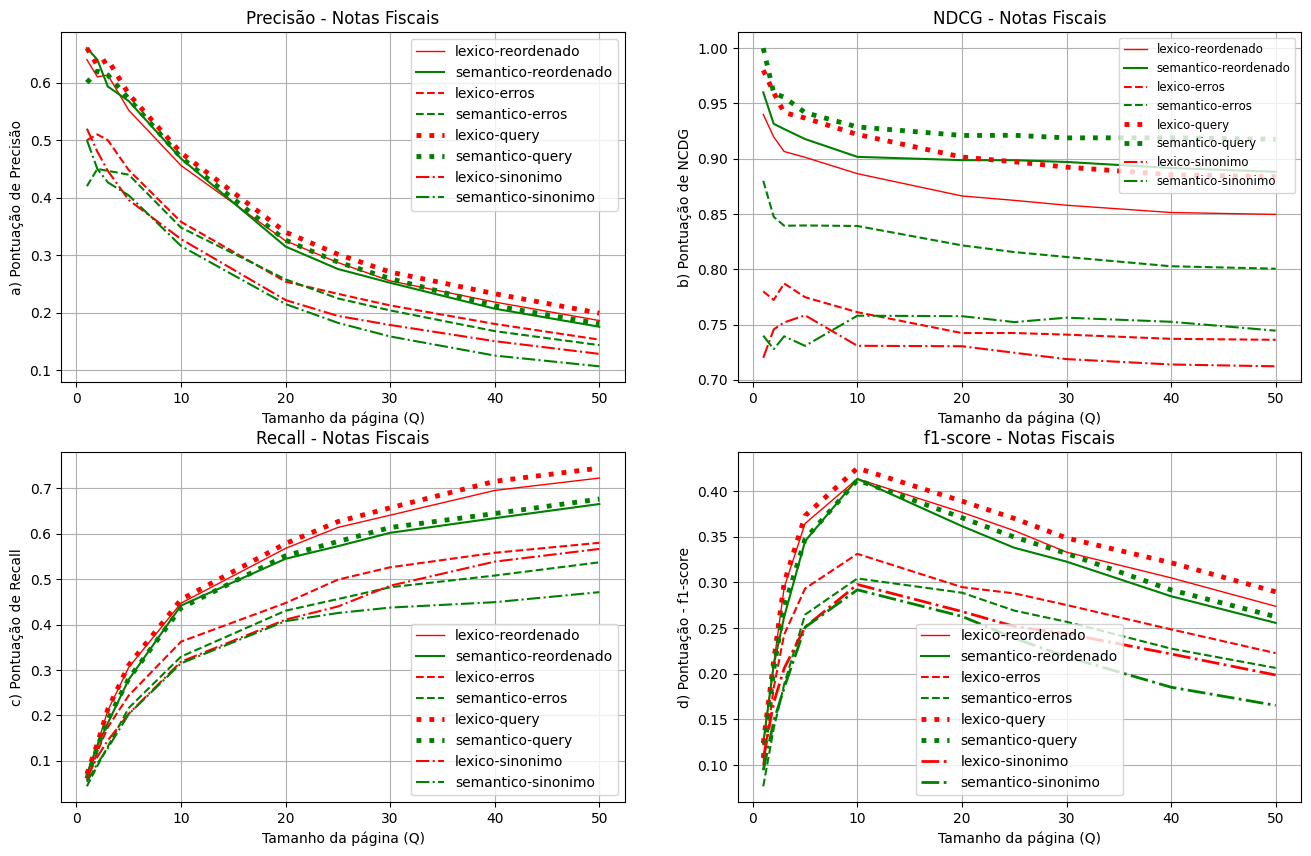

In [25]:
lexico = grouped_fiscais[grouped_fiscais['abordagem'] == 'lexico']   

semantico = grouped_fiscais[grouped_fiscais['abordagem'] == 'semantico']   
_, ax = plt.subplots(2, 2, figsize=(16,10))
ax[0,0].set_title('Precisão - Notas Fiscais')
ax[0,0].set_xlabel('Tamanho da página (Q)')
ax[0,0].set_ylabel('a) Pontuação de Precisão')
ax[0,0].plot(lexico['size_page'], lexico['precision_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[0,0].plot(semantico['size_page'], semantico['precision_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[0,0].plot(lexico['size_page'], lexico['precision_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[0,0].plot(semantico['size_page'], semantico['precision_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[0,0].plot(lexico['size_page'], lexico['precision_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[0,0].plot(semantico['size_page'], semantico['precision_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[0,0].plot(lexico['size_page'], lexico['precision_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[0,0].plot(semantico['size_page'], semantico['precision_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[0,0].legend()
ax[0,0].grid('major')

ax[0,1].set_title('NDCG - Notas Fiscais')
ax[0,1].set_xlabel('Tamanho da página (Q)')
ax[0,1].set_ylabel('b) Pontuação de NCDG')
ax[0,1].plot(lexico['size_page'], lexico['ndcg_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[0,1].plot(lexico['size_page'], lexico['ndcg_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[0,1].plot(lexico['size_page'], lexico['ndcg_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[0,1].plot(lexico['size_page'], lexico['ndcg_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[0,1].grid('major')
ax[0,1].legend(fontsize=8.5)

ax[1,0].set_title('Recall - Notas Fiscais')
ax[1,0].set_xlabel('Tamanho da página (Q)')
ax[1,0].set_ylabel('c) Pontuação de Recall')
ax[1,0].plot(lexico['size_page'], lexico['recall_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[1,0].plot(semantico['size_page'], semantico['recall_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[1,0].plot(lexico['size_page'], lexico['recall_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[1,0].plot(semantico['size_page'], semantico['recall_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[1,0].plot(lexico['size_page'], lexico['recall_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[1,0].plot(semantico['size_page'], semantico['recall_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[1,0].plot(lexico['size_page'], lexico['recall_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[1,0].plot(semantico['size_page'], semantico['recall_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[1,0].grid('major')
ax[1,0].legend()

ax[1,1].set_title('f1-score - Notas Fiscais')
ax[1,1].set_xlabel('Tamanho da página (Q)')
ax[1,1].set_ylabel('d) Pontuação - f1-score')
ax[1,1].plot(lexico['size_page'], lexico['f1-score_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[1,1].plot(lexico['size_page'], lexico['f1-score_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[1,1].plot(lexico['size_page'], lexico['f1-score_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[1,1].plot(lexico['size_page'], lexico['f1-score_sinonimos'], label='lexico-sinonimo', color='red', linewidth=2, linestyle='-.')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_sinonimos'], label='semantico-sinonimo', color='green', linewidth=2, linestyle='-.')
ax[1,1].grid('major')
ax[1,1].legend()

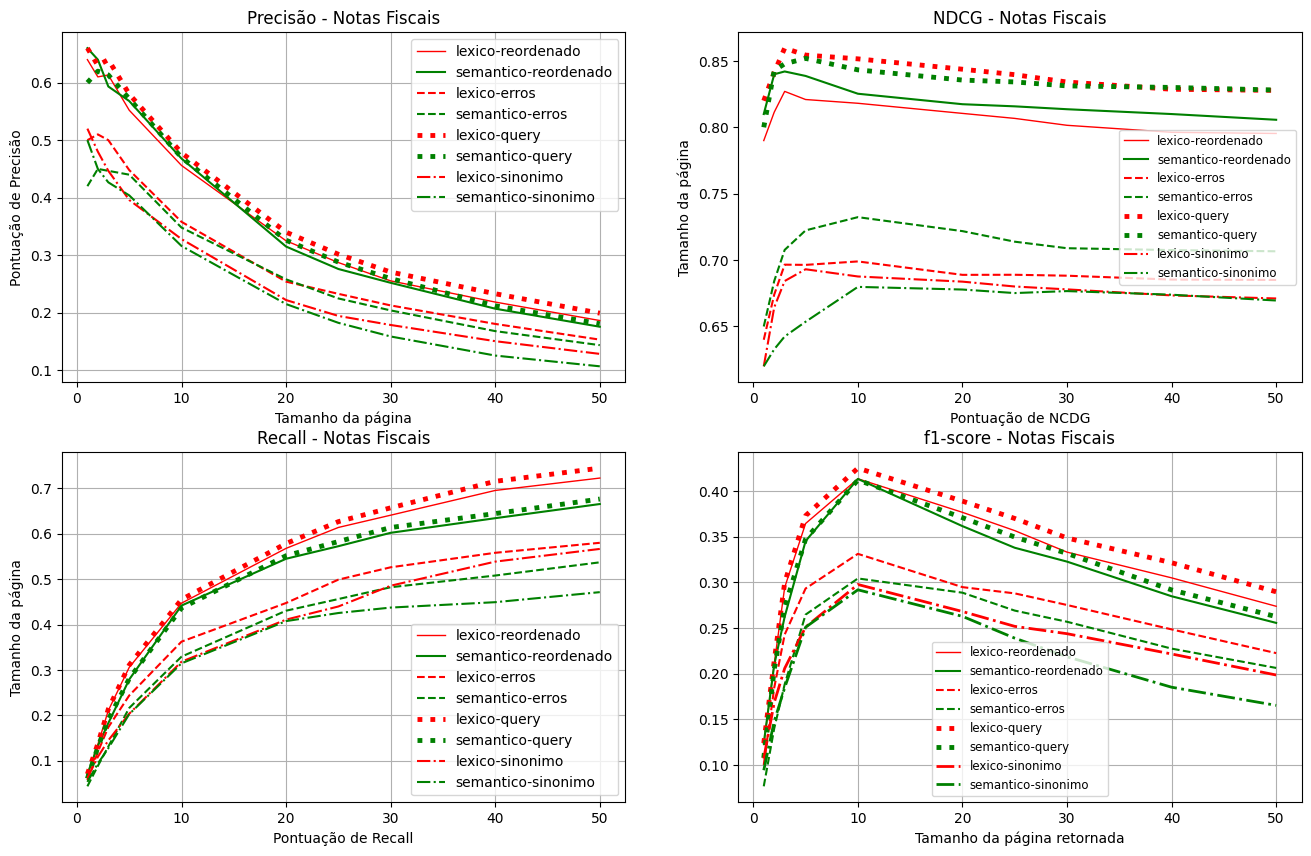

In [21]:
lexico = grouped_nf[grouped_nf['abordagem'] == 'lexico']   

semantico = grouped_nf[grouped_nf['abordagem'] == 'semantico']   
_, ax = plt.subplots(2, 2, figsize=(16,10))
ax[0,0].set_title('Precisão - Notas Fiscais')
ax[0,0].set_xlabel('Tamanho da página')
ax[0,0].set_ylabel('Pontuação de Precisão')
ax[0,0].plot(lexico['size_page'], lexico['precision_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[0,0].plot(semantico['size_page'], semantico['precision_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[0,0].plot(lexico['size_page'], lexico['precision_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[0,0].plot(semantico['size_page'], semantico['precision_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[0,0].plot(lexico['size_page'], lexico['precision_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[0,0].plot(semantico['size_page'], semantico['precision_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[0,0].plot(lexico['size_page'], lexico['precision_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[0,0].plot(semantico['size_page'], semantico['precision_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[0,0].legend()
ax[0,0].grid('major')

ax[0,1].set_title('NDCG - Notas Fiscais')
ax[0,1].set_xlabel('Pontuação de NCDG')
ax[0,1].set_ylabel('Tamanho da página')
ax[0,1].plot(lexico['size_page'], lexico['ndcg_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[0,1].plot(lexico['size_page'], lexico['ndcg_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[0,1].plot(lexico['size_page'], lexico['ndcg_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[0,1].plot(lexico['size_page'], lexico['ndcg_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[0,1].plot(semantico['size_page'], semantico['ndcg_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')

ax[0,1].legend(fontsize=8.5)

ax[1,0].set_title('Recall - Notas Fiscais')
ax[1,0].set_xlabel('Tamanho da página')
ax[1,0].set_ylabel('Pontuação de NDCG')
ax[1,0].set_title('Recall - Notas Fiscais')
ax[1,0].set_xlabel('Pontuação de Recall')
ax[1,0].set_ylabel('Tamanho da página')
ax[1,0].plot(lexico['size_page'], lexico['recall_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[1,0].plot(semantico['size_page'], semantico['recall_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[1,0].plot(lexico['size_page'], lexico['recall_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[1,0].plot(semantico['size_page'], semantico['recall_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[1,0].plot(lexico['size_page'], lexico['recall_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[1,0].plot(semantico['size_page'], semantico['recall_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[1,0].plot(lexico['size_page'], lexico['recall_sinonimos'], label='lexico-sinonimo', color='red', linestyle='-.')
ax[1,0].plot(semantico['size_page'], semantico['recall_sinonimos'], label='semantico-sinonimo', color='green', linestyle='-.')
ax[1,0].grid('major')
ax[1,0].legend()

ax[1,1].set_title('f1-score - Notas Fiscais')
ax[1,1].set_xlabel('Tamanho da página retornada')
ax[1,1].set_ylabel('')
ax[1,1].plot(lexico['size_page'], lexico['f1-score_reordenados'], label='lexico-reordenado', color='red', linewidth=1.0, linestyle='-')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_reordenados'], label='semantico-reordenado', color='green', linestyle='-'  )
ax[1,1].plot(lexico['size_page'], lexico['f1-score_erros_digitacao'], label='lexico-erros', color='red', linestyle='--')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_erros_digitacao'], label='semantico-erros', color='green', linestyle='--'  )
ax[1,1].plot(lexico['size_page'], lexico['f1-score_query'], label='lexico-query', color='red', linewidth=3.5, linestyle=':')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_query'], label='semantico-query', color='green', linewidth=3.5, linestyle=':')
ax[1,1].plot(lexico['size_page'], lexico['f1-score_sinonimos'], label='lexico-sinonimo', color='red', linewidth=2, linestyle='-.')
ax[1,1].plot(semantico['size_page'], semantico['f1-score_sinonimos'], label='semantico-sinonimo', color='green', linewidth=2, linestyle='-.')
ax[1,1].grid('major')
ax[1,1].legend(fontsize=8.5)

# Temp


In [14]:
result_tp_ctm = pd.read_csv('relv_test.csv')
result_tp_ctm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  2000 non-null   int64  
 1   Unnamed: 0    2000 non-null   int64  
 2   query         2000 non-null   object 
 3   querySize     2000 non-null   int64  
 4   repetition    2000 non-null   int64  
 5   abordagem     2000 non-null   object 
 6   result        2000 non-null   object 
 7   time          2000 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 125.1+ KB


In [13]:
result_tp_ctm

,Unnamed: 0.1,Unnamed: 0,query,querySize,repetition,abordagem,result,time
0,0,0,Cartucho De Tinta Para,4,8,semantico,"b'{""took"":27,""timed_out"":false,""_shards"":{""tot...",0.056345
1,1,1,Cartucho De Tinta Para,4,8,lexico,"b'{""took"":1,""timed_out"":false,""_shards"":{""tota...",0.007204
2,2,2,Bandeira Institucional,2,2,semantico,"b'{""took"":28,""timed_out"":false,""_shards"":{""tot...",0.037870
3,3,3,Bandeira Institucional,2,2,lexico,"b'{""took"":1,""timed_out"":false,""_shards"":{""tota...",0.006089
4,4,4,Cartucho,1,7,semantico,"b'{""took"":30,""timed_out"":false,""_shards"":{""tot...",0.039528
...,...,...,...,...,...,...,...,...
1995,1995,1995,Mesa Cabeceira Material,3,2,lexico,"b'{""took"":0,""timed_out"":false,""_shards"":{""tota...",0.006258
1996,1996,1996,Cartucho Tinta Impressora Hp Tipo,5,2,semantico,"b'{""took"":25,""timed_out"":false,""_shards"":{""tot...",0.030358
1997,1997,1997,Cartucho Tinta Impressora Hp Tipo,5,2,lexico,"b'{""took"":0,""timed_out"":false,""_shards"":{""tota...",0.002519
1998,1998,1998,Grampo Uso Odontológico Material Aço,5,4,semantico,"b'{""took"":29,""timed_out"":false,""_shards"":{""tot...",0.035104


In [15]:
result_tp_ctm.groupby(['abordagem']).agg({'time': ['mean', 'std']})

time          
               mean       std
abordagem                    
lexico     0.003806  0.001591
semantico  0.032599  0.005500

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

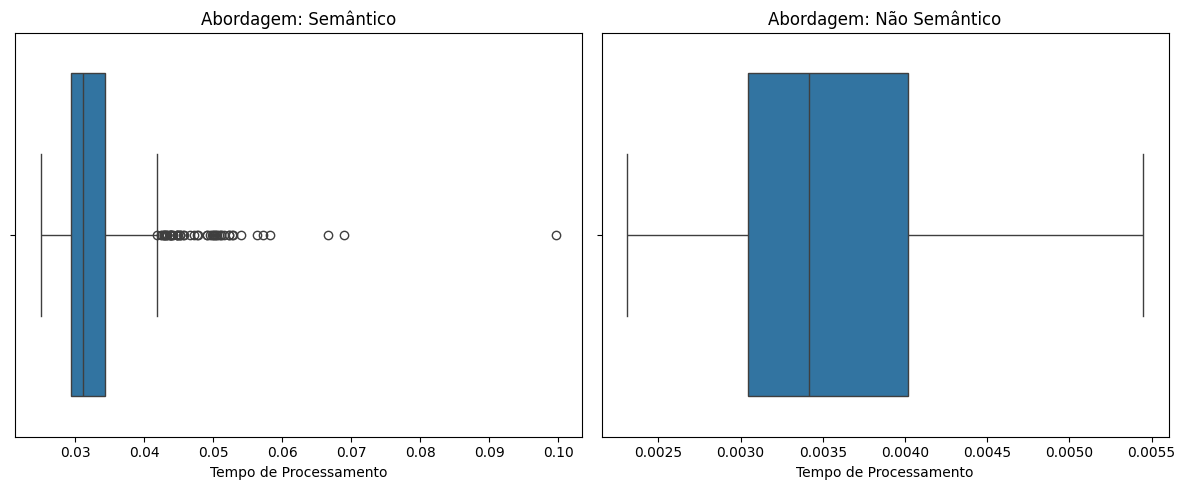

In [73]:
semantico = result_tp_ctm[result_tp_ctm['abordagem'] == 'semantico']
lexico = result_tp_ctm[result_tp_ctm['abordagem'] == 'lexico']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=semantico, x='time', ax=axes[0])
axes[0].set_title('Abordagem: Semântico')
axes[0].set_xlabel('Tempo de Processamento')
axes[0].set_ylabel('')

sns.boxplot(data=lexico, x='time', ax=axes[1], showfliers=False)
axes[1].set_title('Abordagem: Não Semântico')
axes[1].set_xlabel('Tempo de Processamento')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

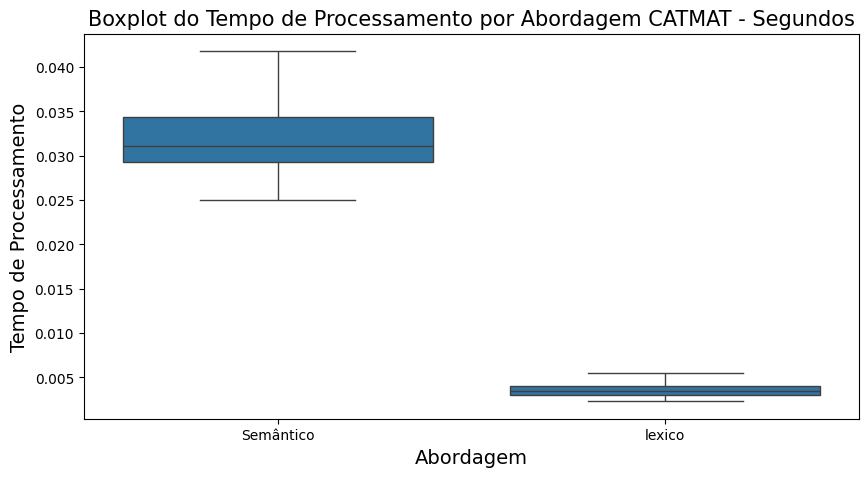

In [160]:
result_tp_ctm['abordagem_numerica'] = result_tp_ctm['abordagem'].map({'semantico': 1, 'lexico': 2})

plt.figure(figsize=(10, 5))
sns.boxplot(data=result_tp_ctm, x='abordagem_numerica', y='time', showfliers= False)

plt.xlabel('Abordagem', fontsize = 14)
plt.ylabel('Tempo de Processamento', fontsize = 14)
plt.title('Boxplot do Tempo de Processamento por Abordagem CATMAT - Segundos', fontsize = 15)

plt.xticks(ticks=[0, 1], labels=['Semântico', 'lexico'])

plt.show()

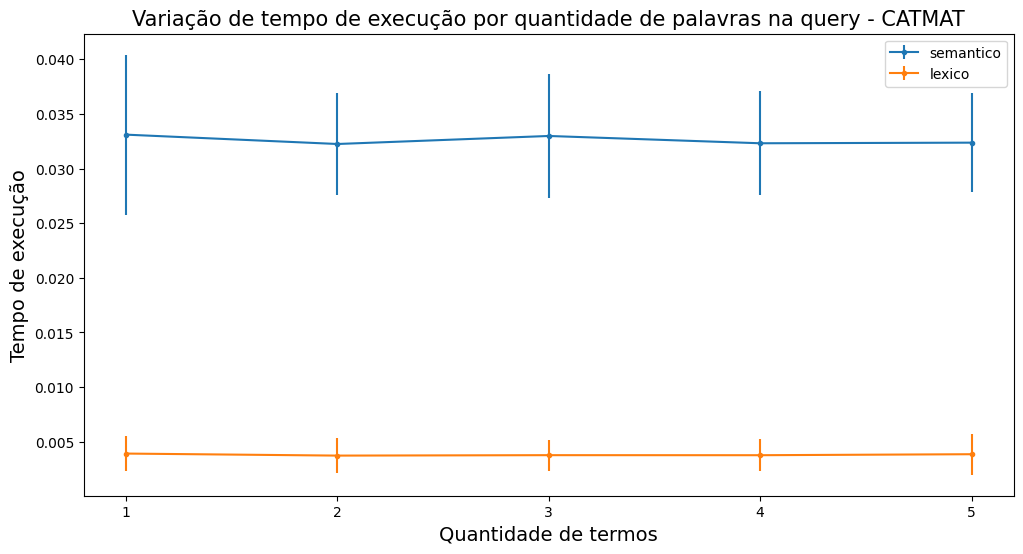

In [17]:
grouped_semantico = result_tp_ctm[result_tp_ctm['abordagem'] == 'semantico'][['querySize', 'time']].groupby('querySize', as_index=False).agg({'time': ['mean', 'std']})
grouped_semantico
grouped_lexico = result_tp_ctm[result_tp_ctm['abordagem'] == 'lexico'][['querySize', 'time']].groupby('querySize', as_index=False).agg({'time': ['mean', 'std']})
grouped_lexico

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
line1 = ax.errorbar(grouped_semantico['querySize'], grouped_semantico['time']['mean'], grouped_semantico['time']['std'], marker='.')
line2 = ax.errorbar(grouped_lexico['querySize'], grouped_lexico['time']['mean'], grouped_lexico['time']['std'], marker='.')
ax.set_xlabel('Quantidade de termos', fontsize = 14)
ax.set_ylabel('Tempo de execução', fontsize = 14)
plt.title('Variação de tempo de execução por quantidade de palavras na query - CATMAT', fontsize = 15)
ax.set_xticks([1, 2, 3, 4, 5])
ax.legend(handles=[line1, line2], labels=['semantico', 'lexico'])

plt.show()


In [28]:
result_nf = pd.read_csv('tempo_nf.csv')
result_nf

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,query,type,querySize,repetition,abordagem,result,time
0,0,0,0,ESPATULA,med2,1,9,semantico,"b'{""took"":6312,""timed_out"":false,""_shards"":{""t...",6.322961
1,1,1,1,ESPATULA,med2,1,9,lexico,"b'{""took"":8,""timed_out"":false,""_shards"":{""tota...",0.012407
2,2,2,2,ALCOOL SANTA CRUZ 96o/o 1L,max,5,10,semantico,"b'{""took"":84,""timed_out"":false,""_shards"":{""tot...",0.089712
3,3,3,3,ALCOOL SANTA CRUZ 96o/o 1L,max,5,10,lexico,"b'{""took"":44,""timed_out"":false,""_shards"":{""tot...",0.047080
4,4,4,4,CAFE PILAO,med1,2,8,semantico,"b'{""took"":93,""timed_out"":false,""_shards"":{""tot...",0.098455
...,...,...,...,...,...,...,...,...,...,...
3995,3995,3995,3995,BUBBALOO UVA DISPLAY 300G,med1,4,9,lexico,"b'{""took"":1,""timed_out"":false,""_shards"":{""tota...",0.003827
3996,3996,3996,3996,ESTJ LIZ NAT/22,max,3,7,semantico,"b'{""took"":87,""timed_out"":false,""_shards"":{""tot...",0.094232
3997,3997,3997,3997,ESTJ LIZ NAT/22,max,3,7,lexico,"b'{""took"":1,""timed_out"":false,""_shards"":{""tota...",0.003915
3998,3998,3998,3998,ESTJ LIZ,max,2,8,semantico,"b'{""took"":78,""timed_out"":false,""_shards"":{""tot...",0.084812


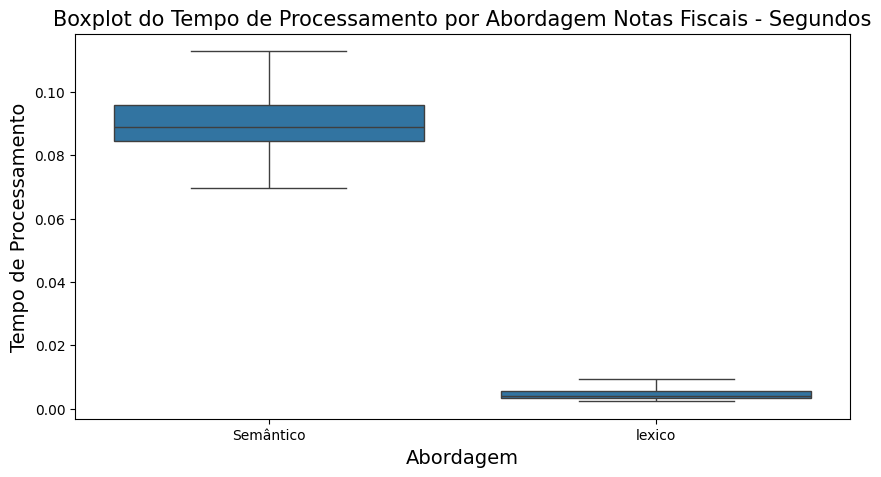

In [5]:
result_nf['abordagem_numerica'] = result_nf['abordagem'].map({'semantico': 1, 'lexico': 2})

plt.figure(figsize=(10, 5))
sns.boxplot(data=result_nf, x='abordagem_numerica', y='time', showfliers= False)

plt.xlabel('Abordagem', fontsize=14)
plt.ylabel('Tempo de Processamento', fontsize=14)
plt.title('Boxplot do Tempo de Processamento por Abordagem Notas Fiscais - Segundos', fontsize=15)

plt.xticks(ticks=[0, 1], labels=['Semântico', 'lexico'])

plt.show()


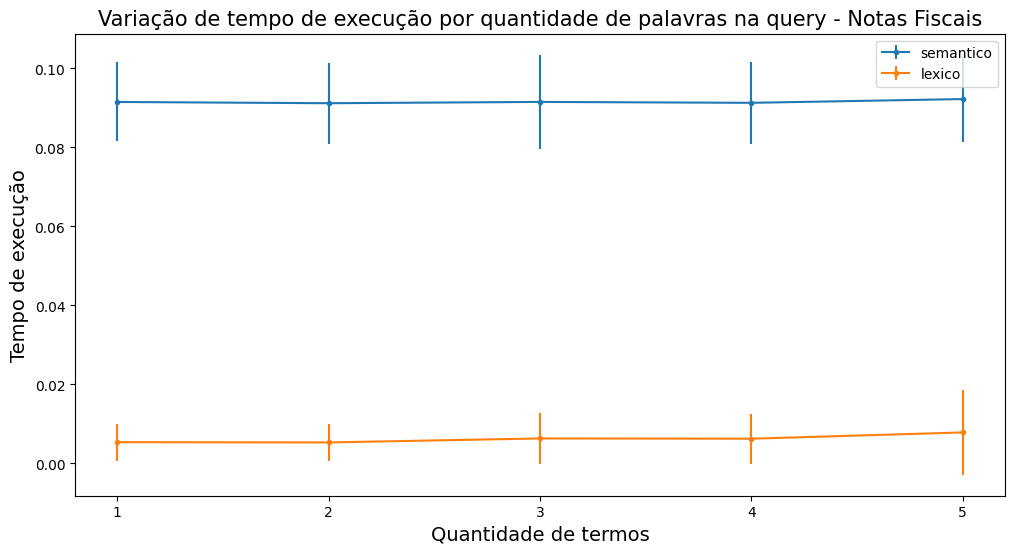

In [23]:
import matplotlib.pyplot as plt
result_plt = result_nf[result_nf['time'] <= 0.4]
grouped_semantico = result_plt[result_plt['abordagem'] == 'semantico'][['querySize', 'time']].groupby('querySize', as_index=False).agg({'time': ['mean', 'std']})
grouped_lexico = result_plt[result_plt['abordagem'] == 'lexico'][['querySize', 'time']].groupby('querySize', as_index=False).agg({'time': ['mean', 'std']})

grouped_semantico = grouped_semantico[grouped_semantico[('time', 'mean')] - 2 * grouped_semantico[('time', 'std')] < grouped_semantico[('time', 'mean')]]
grouped_lexico = grouped_lexico[grouped_lexico[('time', 'mean')] - 2 * grouped_lexico[('time', 'std')] < grouped_lexico[('time', 'mean')]]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

line1 = ax.errorbar(grouped_semantico['querySize'], grouped_semantico['time']['mean'], grouped_semantico['time']['std'], marker='.')
line2 = ax.errorbar(grouped_lexico['querySize'], grouped_lexico['time']['mean'], grouped_lexico['time']['std'], marker='.')

ax.set_xlabel('Quantidade de termos', fontsize=14)
ax.set_ylabel('Tempo de execução', fontsize=14)
plt.title('Variação de tempo de execução por quantidade de palavras na query - Notas Fiscais', fontsize=15)
ax.set_xticks([1, 2, 3, 4, 5])

ax.legend(handles=[line1, line2], labels=['semantico', 'lexico'])

In [9]:
grouped = result_nf.groupby(['abordagem', 'type'], as_index=False).agg({'time': ['mean']})
grouped.sort_values(by='type', inplace=True)
grouped


,abordagem,type,time
,,,mean
0,lexico,max,0.005970
4,semantico,max,0.091918
1,lexico,med1,0.006007
5,semantico,med1,0.091995
2,lexico,med2,0.006744
6,semantico,med2,0.105611
3,lexico,min,0.006249
7,semantico,min,0.093845


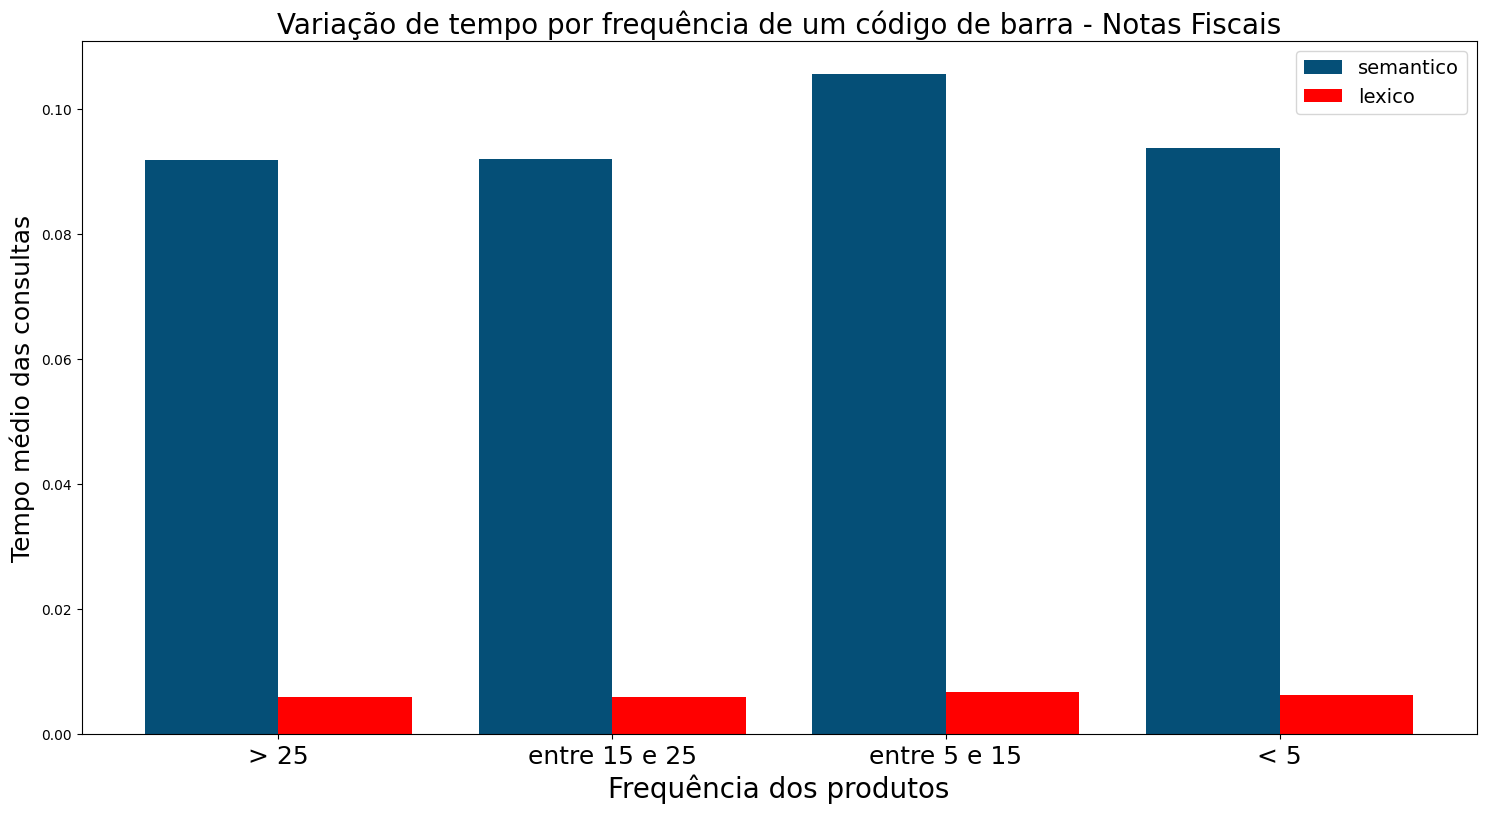

In [31]:
grouped = result_nf.groupby(['abordagem', 'type'], as_index=False).agg({'time': ['mean']})
grouped.sort_values(by='type', inplace=True)
X = ['> 25', 'entre 15 e 25', 'entre 5 e 15', '< 5']
X_axis = np.arange(len(X))

figure = plt.figure(figsize=(18, 9))
plt.bar(X_axis - 0.2, grouped[grouped['abordagem'] == 'semantico']['time']['mean'], 0.4, label = 'semantico', color = '#054f77') 
plt.bar(X_axis + 0.2, grouped[grouped['abordagem'] == 'lexico']['time']['mean'], 0.4, label = 'lexico', color = 'red') 
plt.title('Variação de tempo por frequência de um código de barra - Notas Fiscais',fontsize=20)

plt.xticks(X_axis, X, fontsize=18) 
plt.xlabel("Frequência dos produtos", fontsize=20) 
plt.ylabel("Tempo médio das consultas",fontsize=18) 
plt.legend(fontsize=14) 
plt.show() 

